<i>Note: This notebook was created and ran on kaggle a link to download the dataset in shown 
<a herf='https://www.kaggle.com/datasets/gpiosenka/cards-image-datasetclassification/download?datasetVersionNumber=1'>here</a></i>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
#Importing Python Packages
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,Rescaling
from tensorflow.keras.utils import image_dataset_from_directory as image_data
import PIL
import PIL.Image


In [20]:
#Assigning directories to variables
card_information = pd.read_csv('../input/cards-image-datasetclassification/playing cards.csv')
train_dir = '../input/cards-image-datasetclassification/train'
test_dir = '../input/cards-image-datasetclassification/test'
valid_dir = '../input/cards-image-datasetclassification/valid'

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

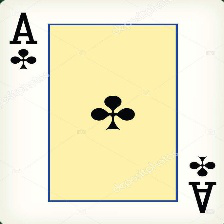

In [6]:
PIL.Image.open(str('../input/cards-image-datasetclassification/train/ace of clubs/006.jpg'))

In [24]:
train_ds = image_data(
  train_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size)

test_ds = image_data(
  test_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size)

valid_ds = image_data(
  valid_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7509 files belonging to 52 classes.
Found 260 files belonging to 52 classes.
Found 260 files belonging to 52 classes.


In [25]:
class_names = train_ds.class_names
num_classes = len(class_names)
print(num_classes)
print(class_names)

52
['ace of clubs', 'ace of diamonds', 'ace of hearts', 'ace of spades', 'eight of clubs', 'eight of diamonds', 'eight of hearts', 'eight of spades', 'five of clubs', 'five of diamonds', 'five of hearts', 'five of spades', 'four of clubs', 'four of diamonds', 'four of hearts', 'four of spades', 'jack of clubs', 'jack of diamonds', 'jack of hearts', 'jack of spades', 'king of clubs', 'king of diamonds', 'king of hearts', 'king of spades', 'nine of clubs', 'nine of diamonds', 'nine of hearts', 'nine of spades', 'queen of clubs', 'queen of diamonds', 'queen of hearts', 'queen of spades', 'seven of clubs', 'seven of diamonds', 'seven of hearts', 'seven of spades', 'six of clubs', 'six of diamonds', 'six of hearts', 'six of spades', 'ten of clubs', 'ten of diamonds', 'ten of hearts', 'ten of spades', 'three of clubs', 'three of diamonds', 'three of hearts', 'three of spades', 'two of clubs', 'two of diamonds', 'two of hearts', 'two of spades']


In [26]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_dis =test_ds.cache().prefetch(buffer_size=AUTOTUNE)
valid_ds = valid_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [27]:
model = Sequential([
  Rescaling(1./255),
  Conv2D(32, 3, activation='relu'),
  MaxPooling2D(),
  Conv2D(32, 3, activation='relu'),
  MaxPooling2D(),
  Conv2D(32, 3, activation='relu'),
  MaxPooling2D(),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(num_classes)
])

model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [28]:
model.fit(
  train_ds,
  validation_data=valid_ds,
  epochs=6,
  verbose = 1
)

Epoch 1/6
235/235 [==============================] - 13s 51ms/step - loss: 2.7036 - accuracy: 0.2967 - val_loss: 1.5260 - val_accuracy: 0.5962
Epoch 2/6
235/235 [==============================] - 3s 13ms/step - loss: 1.6079 - accuracy: 0.5605 - val_loss: 1.1784 - val_accuracy: 0.6577
Epoch 3/6
235/235 [==============================] - 3s 14ms/step - loss: 1.0101 - accuracy: 0.7226 - val_loss: 1.3279 - val_accuracy: 0.6731
Epoch 4/6
235/235 [==============================] - 3s 13ms/step - loss: 0.5727 - accuracy: 0.8422 - val_loss: 1.4888 - val_accuracy: 0.7154
Epoch 5/6
235/235 [==============================] - 3s 13ms/step - loss: 0.3348 - accuracy: 0.9136 - val_loss: 1.4144 - val_accuracy: 0.7462
Epoch 6/6
235/235 [==============================] - 3s 14ms/step - loss: 0.2199 - accuracy: 0.9427 - val_loss: 1.5789 - val_accuracy: 0.7692


In [38]:
model.evaluate(test_ds)

9/9 [==============================] - 0s 12ms/step - loss: 1.9294 - accuracy: 0.7654


[1.9294109344482422, 0.7653846144676208]

In [39]:
model.save('playing_card.h5')

In [41]:
saved_model =tf.keras.models.load_model('./playing_card.h5')

In [43]:
saved_model.evaluate(test_ds)

9/9 [==============================] - 0s 9ms/step - loss: 1.9294 - accuracy: 0.7654


[1.9294109344482422, 0.7653846144676208]

MODEL ACCURACY : 0.7653